In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Utility function
def plot_map(*polys):
    for poly in polys:
        x,y = poly.exterior.xy
        plt.fill(x,y, "g")
    plt.axis('off')
    plt.show()

# The hard-coded map

Polygons drawn by hand hardly constitutes a map-generating recipe. But, the code below illustrates the minimum requirements for a map. A single polygon and a function to plot it.

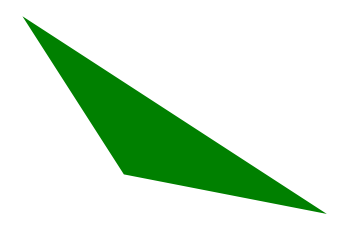

In [3]:
# Basic hardcoded polygon map

poly = Polygon([(0,5),
                    (1,1),
                    (3,0),
                    ])

plot_map(poly)

# Noise points to polygons

A basic meta-recipe with two steps:

1. Generate set of noisy points
2. Apply a point-to-polygon algorithm

Some algorithms for the second step:
- Hull algorithms directly yield map polygons:
    - Convex hull
    - Concave hull, e.g. alphashape
- Clustering algorithms:
    - DBScan
    - K-means
    
Note that clustering algorithms don't yield polygons, but they can be used to identify points on the same "island".

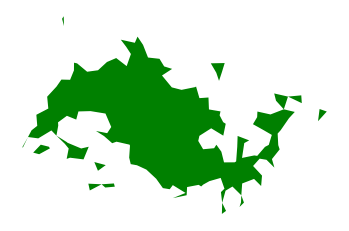

In [109]:
# Alpha-shape map (non-layered)
import alphashape
import numpy as np
from sklearn.datasets import make_moons, make_blobs
N_POINTS = 500
ALPHA = 2.5
RANDOM_STATE = 0

blobs_params = dict(random_state=RANDOM_STATE, n_samples=N_POINTS, n_features=2)
# https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html
points = make_blobs(centers=[[0, 0], [0, 0]], cluster_std=[2.5, .3],
               **blobs_params)[0]
points += make_moons(n_samples=N_POINTS, noise=.1, random_state=RANDOM_STATE)[0] * 4
    
# https://pypi.org/project/alphashape/
polys = alphashape.alphashape(points, ALPHA)

# plot polygons
plot_map(*polys)